# Data Science in Python

<h4>Algoritma Team</h4>
<h5>January 15th, 2018</h5>

## Getting Started With Python

A few things to note before we cover the basics of Python:
+ Python recognize whitespace as an intrepeted syntax. This limitation in Python helps to keep your code clean and structured.
+ Python is also case-sensitive. An object called "something" will be different with an object called "Something".

###  Basic Data Structure

Yesterday, we have cover the basic data structure of objects to work with R. In Python, we have a similar data structure of 3 major classes:
+ Boolean: True or False
+ Numeric: integer or float.
+ String: list of characters.

### Importing Packages

Python as a multipurpose language utilize packages in order to be able to work with data. Packages here is basically the term that is equivalent to a library in R. There are some of the must have packages for data science tasks.</p>
+ NumPy : Multidimensional data library </p>
+ SciPy : Mathematical library </p>
+ pandas : Data manipulation and analysis library </p>
+ Scikit-learn : Machine learning library </p>
+ MatPlotLib : Visualization library </p>

How to use the library you may ask. Let's follow the example below.

### Working with data in Python

Pandas is a python package that provide a data structure to work with relational or labeled data. This is a basic building block of data analysis or what we would know as data frame. To import the required packages we type in `import` followed by the name of the package. We can also state `as` to ease up future reference to the package. The way we want to name the alias of our package is completely up to us, but there are some alias that is commonly used by the community (NumPy as np, pandas as pd, MatPlotLib as plt, and so on.). 

#### Essential Data Exploratory Steps

Let's familiarize ourselves with the basic function of pandas with the exercise below using a retail datasets. Import the dataset using pandas function `read_csv()`. You can peek the head of the data using `head()` function.

In [2]:
import pandas as pd

df = pd.read_csv("datasets/retail.csv" , encoding='latin-1')
df.head(3)

Row ID        Order ID Order Date Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156    11/8/16  11/11/16  Second Class    CG-12520   
1       2  CA-2016-152156    11/8/16  11/11/16  Second Class    CG-12520   
2       3  CA-2016-138688    6/12/16   6/16/16  Second Class    DV-13045   

     Segment       Product ID         Category Sub-Category  \
0   Consumer  FUR-BO-10001798        Furniture    Bookcases   
1   Consumer  FUR-CH-10000454        Furniture       Chairs   
2  Corporate  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714

Our pandas package created a data frame object which has the form of a simple table. The object has some useful attributes to give us information about our data like `shape`, `index`, and `columns`. 

In [3]:
print("Dataframe shape: "+ str(df.shape))
print("Dataframe index: "+ str(df.index))
print("Dataframe columns name: "+ str(df.columns))

Dataframe shape: (9994, 15)
Dataframe index: RangeIndex(start=0, stop=9994, step=1)
Dataframe columns name: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


It's also the same when we do in R, we can have `columns` names using `names` function.

There are also useful function to gain insight from our data, like for example `describe()`. It generates descriptive statistics that summarize the dataset's distribution, excluding NaN number. The equivalent of `describe` in R will be `summary`. 

In [3]:
df.describe()

Row ID         Sales     Quantity     Discount       Profit
count  9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   4997.500000    229.858001     3.789574     0.156203    28.656896
std    2885.163629    623.245101     2.225110     0.206452   234.260108
min       1.000000      0.444000     1.000000     0.000000 -6599.978000
25%    2499.250000     17.280000     2.000000     0.000000     1.728750
50%    4997.500000     54.490000     3.000000     0.200000     8.666500
75%    7495.750000    209.940000     5.000000     0.200000    29.364000
max    9994.000000  22638.480000    14.000000     0.800000  8399.976000

Remember that we have factor in R? In Python, we don't have a specific class in identifying factors. But we can extract unique value for each column using a very simple code.

In [4]:
print("Unique value for segment column includes " , end="")
print(df['Segment'].unique())

Unique value for segment column includes ['Consumer' 'Corporate' 'Home Office']


#### Selecting Data

Dataframe acts like a table and each element can be accessed using its index. We can select specific colums of the data.

In [5]:
df[['Customer ID','Sales','Quantity']].head(5)

Customer ID     Sales  Quantity
0    CG-12520  261.9600         2
1    CG-12520  731.9400         3
2    DV-13045   14.6200         2
3    SO-20335  957.5775         5
4    SO-20335   22.3680         2

We can also select specific rows sequence of the data.

In [6]:
df[40:43]

Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
40      41  CA-2015-117415   12/27/15  12/31/15  Standard Class    SN-20710   
41      42  CA-2017-120999    9/10/17   9/15/17  Standard Class    LC-16930   
42      43  CA-2016-101343    7/17/16   7/22/16  Standard Class    RA-19885   

        Segment       Product ID         Category Sub-Category  \
40  Home Office  TEC-PH-10000486       Technology       Phones   
41    Corporate  TEC-PH-10004093       Technology       Phones   
42    Corporate  OFF-ST-10003479  Office Supplies      Storage   

                                        Product Name    Sales  Quantity  \
40                   Plantronics HL10 Handset Lifter  371.168         4   
41                                Panasonic Kx-TS550  147.168         4   
42  Eldon Base for stackable storage shelf, platinum   77.880         2   

    Discount   Profit  
40       0.2  41.7564  
41       0.2  16.5564  
42       0.0   3.8940

Next, we would utilize a powerful property `iloc` and `loc`. The first parameter of both of the functions is the row index. However, for `iloc` it will need the column index, while `loc` need the column name.

In [7]:
df.iloc[40,6]

'Home Office'

In [8]:
df.loc[40,'Segment']

'Home Office'

We can also choose multiple number of row using this properties.

In [9]:
df.iloc[40:43,6]

40    Home Office
41      Corporate
42      Corporate
Name: Segment, dtype: object

In [10]:
df.loc[[40,41,42],'Segment']

40    Home Office
41      Corporate
42      Corporate
Name: Segment, dtype: object

#### Boolean Indexing

Boolean indexing is the equivalent of subsetting in R. With boolean indexing we are able to select a specific data based on a certain condition. We can do this by doing a logical check for data rame rows.

In [13]:
df[(df['Segment']=='Home Office') & (df['Category']=='Office Supplies')].head(3)

Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
14      15  US-2015-118983   11/22/15  11/26/15  Standard Class    HP-14815   
15      16  US-2015-118983   11/22/15  11/26/15  Standard Class    HP-14815   
34      35  CA-2017-107727   10/19/17  10/23/17    Second Class    MA-17560   

        Segment       Product ID         Category Sub-Category  \
14  Home Office  OFF-AP-10002311  Office Supplies   Appliances   
15  Home Office  OFF-BI-10000756  Office Supplies      Binders   
34  Home Office  OFF-PA-10000249  Office Supplies        Paper   

                                         Product Name   Sales  Quantity  \
14  Holmes Replacement Filter for HEPA Air Cleaner...  68.810         5   
15   Storex DuraTech Recycled Plastic Frosted Binders   2.544         3   
34                                  Easy-staple paper  29.472         3   

    Discount    Profit  
14       0.8 -123.8580  
15       0.8   -3.8160  
34       0.2    9.9468

Other useful function provided by pandas is `drop()` function. This function allow us to drop a data frame column. We can use this by specifying the column name we want to drop and the index of the axis. If we want to drop a column we would want to specify the axis to be 1.

In [16]:
df_dropped = df.drop(['Row ID','Order ID'], axis=1)
df_dropped.head(3)

Order Date Ship Date     Ship Mode Customer ID    Segment       Product ID  \
0    11/8/16  11/11/16  Second Class    CG-12520   Consumer  FUR-BO-10001798   
1    11/8/16  11/11/16  Second Class    CG-12520   Consumer  FUR-CH-10000454   
2    6/12/16   6/16/16  Second Class    DV-13045  Corporate  OFF-LA-10000240   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714

In [17]:
df_dropped.head(3)

Order Date Ship Date     Ship Mode Customer ID    Segment       Product ID  \
0    11/8/16  11/11/16  Second Class    CG-12520   Consumer  FUR-BO-10001798   
1    11/8/16  11/11/16  Second Class    CG-12520   Consumer  FUR-CH-10000454   
2    6/12/16   6/16/16  Second Class    DV-13045  Corporate  OFF-LA-10000240   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714

The `drop()` function would have a default axis of 0, which means that we can specify the first parameter to be row numbers and use it to drop rows.

In [18]:
df_dropped = df.drop([0,1,2])
df_dropped.head(3)

Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
3       4  US-2015-108966   10/11/15  10/18/15  Standard Class    SO-20335   
4       5  US-2015-108966   10/11/15  10/18/15  Standard Class    SO-20335   
5       6  CA-2014-115812     6/9/14   6/14/14  Standard Class    BH-11710   

    Segment       Product ID         Category Sub-Category  \
3  Consumer  FUR-TA-10000577        Furniture       Tables   
4  Consumer  OFF-ST-10000760  Office Supplies      Storage   
5  Consumer  FUR-FU-10001487        Furniture  Furnishings   

                                        Product Name     Sales  Quantity  \
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   
5  Eldon Expressions Wood and Plastic Desk Access...   48.8600         7   

   Discount    Profit  
3      0.45 -383.0310  
4      0.20    2.5164  
5      0.00   14.1694

The last function that is commonly used is `groupby()` combined with calculation function which can be used to aggregated a dataframe based on the specified column.

In [19]:
df.groupby(by='Category').sum()

Row ID        Sales  Quantity  Discount       Profit
Category                                                               
Furniture        10693326  741999.7953      8028    368.89   18451.2728
Office Supplies  30010535  719047.0320     22906    947.80  122490.8008
Technology        9241154  836154.0330      6939    244.40  145454.9481

Here we see the dataframe is grouped by category and automatically pick a numerical column that can be summed up. The `groupby()` function can be combined with every calculation function like `mean()` or `count()` according to our needs.

#### Cross-Tabulation and Aggregates

Cross-tabulation is used to analyzed and give information about relationship between variables. For example, we want to know how Sales based on Sub.Category and Category from the data we'll use `crosstab`.


In [20]:
pd.crosstab(index=df["Sub-Category"], columns=df["Category"])

Category      Furniture  Office Supplies  Technology
Sub-Category                                        
Accessories           0                0         775
Appliances            0              466           0
Art                   0              796           0
Binders               0             1523           0
Bookcases           228                0           0
Chairs              617                0           0
Copiers               0                0          68
Envelopes             0              254           0
Fasteners             0              217           0
Furnishings         957                0           0
Labels                0              364           0
Machines              0                0         115
Paper                 0             1370           0
Phones                0                0         889
Storage               0              846           0
Supplies              0              190           0
Tables              319                0           0

We can also show the total, using `margins=True`:

In [21]:
pd.crosstab(index=df["Sub-Category"], columns=df["Category"],margins=True)

Category      Furniture  Office Supplies  Technology   All
Sub-Category                                              
Accessories           0                0         775   775
Appliances            0              466           0   466
Art                   0              796           0   796
Binders               0             1523           0  1523
Bookcases           228                0           0   228
Chairs              617                0           0   617
Copiers               0                0          68    68
Envelopes             0              254           0   254
Fasteners             0              217           0   217
Furnishings         957                0           0   957
Labels                0              364           0   364
Machines              0                0         115   115
Paper                 0             1370           0  1370
Phones                0                0         889   889
Storage               0              846           0   846
Supplies              0              190           0   190
Tables              319                0           0   319
All                2121             6026        1847  9994

This allows us to examine the relationship between the explanatory variables (Sub.Category and Category) and Sales.

In [24]:
import numpy as np
ctb = pd.crosstab(index=df["Category"],columns=df["Sub-Category"],values=df["Sales"], aggfunc=np.sum)
ctb

Sub-Category     Accessories  Appliances        Art     Binders    Bookcases  \
Category                                                                       
Furniture                NaN         NaN        NaN         NaN  114879.9963   
Office Supplies          NaN  107532.161  27118.792  203412.733          NaN   
Technology        167380.318         NaN        NaN         NaN          NaN   

Sub-Category         Chairs    Copiers  Envelopes  Fasteners  Furnishings  \
Category                                                                    
Furniture        328449.103        NaN        NaN        NaN    91705.164   
Office Supplies         NaN        NaN  16476.402    3024.28          NaN   
Technology              NaN  149528.03        NaN        NaN          NaN   

Sub-Category        Labels    Machines      Paper      Phones     Storage  \
Category                                                                    
Furniture              NaN         NaN        NaN         NaN         NaN   
Office Supplies  12486.312         NaN  78479.206         NaN  223843.608   
Technology             NaN  189238.631        NaN  330007.054         NaN   

Sub-Category      Supplies      Tables  
Category                                
Furniture              NaN  206965.532  
Office Supplies  46673.538         NaN  
Technology             NaN         NaN

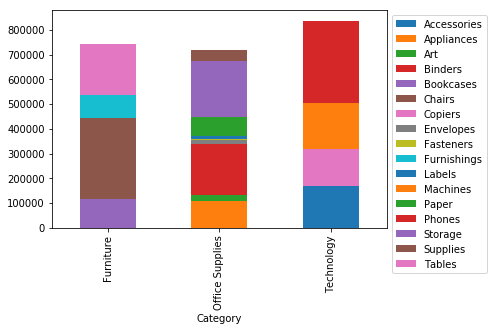

In [25]:
import matplotlib.pyplot as plt
import pylab
ctb.plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
pylab.show()

Here are some example of things in R that we can do in Python. We can use both Python and R to do most common tasks in programming. Each language has its pros and cons for different scenarios and tasks. They are similar enough, and if most of your colleagues are already used to one of them, it's wise to stick with the language while it is also advisable for you to keep the possibility open for future uses.

### Choosing Between R and Python
Both R and Python is a go-to option for data science programming. Each of them has their own advantages and can be used accordingly. A data scientist must at least exposed to both of the language while mastering one of it. Most of the time, the answer is about preference and resources availability.[1](https://www.kdnuggets.com/2015/05/r-vs-python-data-science.html) </p>
+ **Usage :** R is mainly used for data analysis standalone task on individual servers, while Python can be integrated or incorperated into a developed web application or database production. </p>
+ **Users :** R is commonly adopted from researchers, data scientists, and statisticians, while Python is generally picked by developers and programmers for its exposure in the engineering environment. </p> 
+ **Capabilities :** R is usable for a simple data handling practice without any package installation, while Python coming from a general language is utilizing packages such as NumPy and pandas. </p>